In [124]:
from pydub import AudioSegment
from pydub.utils import mediainfo
import numpy as np
import matplotlib.pyplot as plt

In [104]:
SLICE_DURATION = 0.1
SAMPLING_RATE = 16000

In [120]:
def get_sliced_audio_samples(path, slice_duration):
    slice_duration_ms = slice_duration * 1000
    audio = AudioSegment.from_wav(path)
    audio = audio.set_frame_rate(SAMPLING_RATE).set_channels(1)
    slice_starts = np.arange(0, audio.duration_seconds - slice_duration, slice_duration, dtype=np.float32)
    slice_starts_ms = slice_starts * 1000
    slice_func = lambda start: audio[start:start + slice_duration_ms]
    audio_slices = np.vectorize(slice_func)(slice_starts_ms)
    decoder_func = lambda segment: segment.get_array_of_samples()
    return np.array([decoder_func(audio_slice) for audio_slice in audio_slices])

In [132]:
slices = get_sliced_audio_samples("males/0.wav", SLICE_DURATION)

/Users/ashfaq/.local/share/virtualenvs/voice-classification-LVfULqU5/lib/python3.9/site-packages/numpy/lib/function_base.py:2389: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  otypes = ''.join([asarray(outputs[_k]).dtype.char


In [138]:
def normalize_samples(audio_slice):
    max_sample = max(audio_slice)
    return audio_slice / max_sample if max_sample > 0 else audio_slice

In [154]:
random_slice = slices[np.random.randint(len(slices))]
normalized_slice = normalize_samples(random_slice)

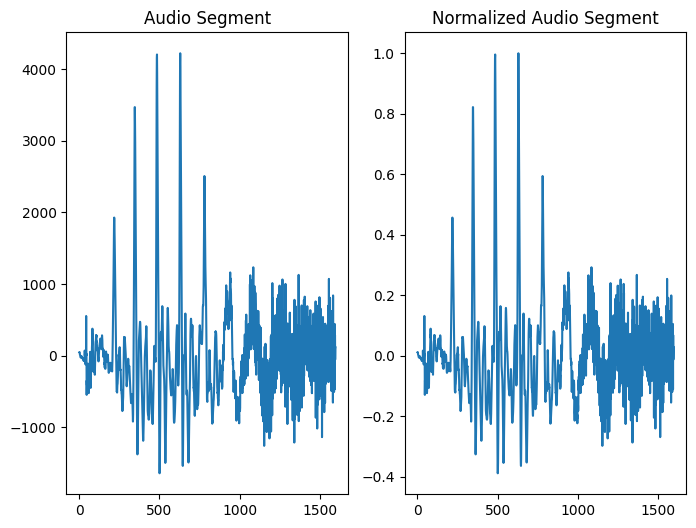

In [155]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title('Audio Segment')
plt.plot(random_slice)
plt.subplot(1, 2, 2)
plt.title('Normalized Audio Segment')
plt.plot(normalized_slice)
plt.show()